# Practical Session 4
## Biomedical Signal and Image Processing
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Evgenia Papavasileiou and Jef Vandemeulebroucke



<font color=blue>Students names and IDs: </font> <Br> Sajjad Mahmoudi 573106 - Somayyeh Gholami 562113

<font color=blue>Academic Year </font>: 2020-2021

### Purpose
The purpose of this exercise session is to obtain insight into feature extraction techniques applied on medical image processing as well as processing of the extracted features. For more information on these concepts see the
related material on the course slides.

The jupyter notebook should be submitted as the report of each practical session by teams of two students. In colab you should download the notebook in the format \*.ipynb and save it as a pdf version through print->save as pdf. Both the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline. Any report sent after the deadline will not be graded. The deadline for the final report is the 24th of December 2020 at 23.59.

### Required libraries
During this practical session, the following libraries will be used:

* Numpy 
* Simple ITK 
* Matplotlib
* Sklearn
* pandas

To import any external library, you need to import it using the **import** statement followed by the name of the library. <br>
Simple ITK is not pre-installed in Colab. To install it use the following code inside a colab cell <br>

pip install SimpleITK

## Part 1: Feature Extraction
In the first part of this practical session you are given a CT image of a lung, together with the segmentation mask and you are asked to extract features belonging to two important groups of features; first order statistics and shape features.

In colab you can access all the files from google drive by using the following code <br>
*from google.colab import drive <br>
drive.mount('/content/drive') <Br>*
Then you can access a folder by providing its path, for example: <br>
path_of_image='/content/drive/My Drive/folder/'


 -  <h3> Load the images </h3>
1. Download the folder LUNG from canvas that contains the DICOM images and upload it in Google Drive. <br>
2. Use SimpleITK functions SimpleITK.ImageSeriesReader() with GetGDCMSeriesFileNames() to read the DICOM series by providing the whole path where the Dicom series are located in google drive. https://simpleitk.readthedocs.io/en/v1.1.0/Examples/DicomSeriesReadModifyWrite/Documentation.html <br>
3. Use function SimpleITK.ReadImage() to obtain the itk images by providing the obtained dicom series. <br>
4. Use function SimpleITK.GetArrayFromImage() to convert the itk image of the previous step into a numpy array. <br>

*To see the documentation of a simpleITK function you can type help(the name of a function). For example:<br>
help(SimpleITK.GetImageFromArray) returns <br>
GetImageFromArray(arr, isVector=None) <br>
    Get a SimpleITK Image from a numpy array. If isVector is True, then the Image will have a Vector pixel type, and the last dimension of the array will be considered the component index. By default when isVector is None, 4D images are automatically considered 3D vector images.*


In [1]:
!pip install SimpleITK
import SimpleITK as sitk
from google.colab import drive
drive.mount('/content/gdrive') 
dcmPath='/content/gdrive/My Drive/Biomedical Signals and Images/WPO4/LUNG'
dcmFileNames = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(dcmPath)
dcmSeries = sitk.ReadImage(dcmFileNames) #ITK image
dcmNpImage = sitk.GetArrayFromImage(dcmSeries) #Numpy image

     |████████████████████████████████| 47.4MB 96kB/s 
Mounted at /content/gdrive


 - <h3> Now load the mask </h3>
5. Download the mask from canvas (both the raw and the mhd files) and upload them in google drive<br>
6. Use SimpleITK function sitk.ReadImage() to read the mask by giving as input the whole path where the mask is stored. <br>
7. Convert the itk mask to a numpy array with function SimpleITK.GetArrayFromImage(). 

In [2]:
mhdPath='/content/gdrive/My Drive/Biomedical Signals and Images/WPO4/lung001_ROI2_GTV-1.mhd'
mhdSeries = sitk.ReadImage(mhdPath)
mhdNpImage = sitk.GetArrayFromImage(mhdSeries)  #no need to load raw mask as it is loaded automatically since loading mhd mask

Note: You can find some examples of SimpleITK's functions here: http://simpleitk.github.io/SimpleITK-Notebooks/01_Image_Basics.html <br>
Also, on that page it is mentioned that:
<h3>The order of index and dimensions need careful attention during conversion </h3>
ITK's Image class does not have a bracket operator. It has a GetPixel which takes an ITK Index object as an argument, which is an array ordered as (x,y,z). This is the convention that SimpleITK's Image class uses for the GetPixel method as well.
While in numpy, an array is indexed in the opposite order (z,y,x).

 - To observe this, get the size of the itkimage resulting from function SimpleITK.ReadImage in step 3. To do this use function GetSize() <br>
Now get the size of the numpy image resulting from function SimpleITK.GetArrayFromImage in step 4.

In [3]:
print('ITK image size:', dcmSeries.GetSize())
print('Numpy image size:', dcmNpImage.shape)

ITK image size: (512, 512, 134)
Numpy image size: (134, 512, 512)


 - <h3> Visualize some slices of the CT image </h3>
In a 2X2 matplolib subplot visualize slices **z=(72,77,82,84)** <br>
Use function imshow and a gray colormap 

*Remember python's indexes start from zero*

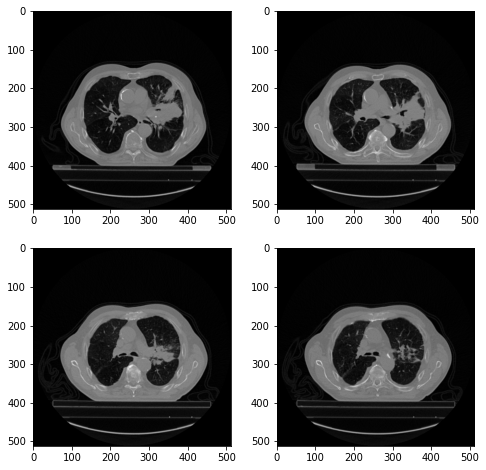

In [4]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2,2, figsize=(8,8))
axarr[0,0].imshow(dcmNpImage[72], cmap='gray')
axarr[0,1].imshow(dcmNpImage[77], cmap='gray')
axarr[1,0].imshow(dcmNpImage[82], cmap='gray')
axarr[1,1].imshow(dcmNpImage[84], cmap='gray')

 - ### Overlay with the masks
Overlay the above slices with the masks.
When plotting the masks, define a value for the parameter 'alpha' of function imshow() and use a different colormap.

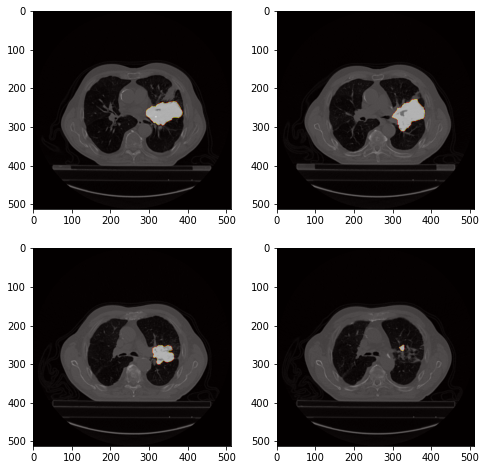

In [5]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2,2, figsize=(8,8))
axarr[0,0].imshow(dcmNpImage[72], cmap='gray')
axarr[0,1].imshow(dcmNpImage[77], cmap='gray')
axarr[1,0].imshow(dcmNpImage[82], cmap='gray')
axarr[1,1].imshow(dcmNpImage[84], cmap='gray')
axarr[0,0].imshow(mhdNpImage[72], cmap='hot', alpha= 0.4)
axarr[0,1].imshow(mhdNpImage[77], cmap='hot', alpha= 0.4)
axarr[1,0].imshow(mhdNpImage[82], cmap='hot', alpha= 0.4)
axarr[1,1].imshow(mhdNpImage[84], cmap='hot', alpha= 0.4)

 - <h3> Feature Extraction: First Order Statistics </h3>
To begin with you are going to extract first order statistics, i.e. features that describe the distribution of voxel intensities within the image region of interest (ROI). <br>
   - To obtain the ROI, take only the part of the image where the mask has true labels, i.e. when mask==1. Use function numpy.where() to get the coordinates and apply them to the numpy image. <br>
   - Convert the obtained image to type 'float' https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html
This is necessary for the calculations that follow.


In [6]:
import numpy as np
index = np.where(mhdNpImage == 1)
ROI = dcmNpImage[index]
floatROI = ROI.astype(float)
print(floatROI)

[   3.  -47.  -90. ... -596. -307.  -59.]


 - Let $X$ be the set of $N_p$ voxels included in the ROI. Given the definitions of the features, calculate the values of the features in the ROI you obtained in the previous step.<br>
Note: you can use existing numpy functions to calculate some features. For example, numpy.mean to calculate feature 'average gray level intesity'. 

#### 1. Minimum
The minimum gray level intensity within the ROI.

In [7]:
minGrayIntensity = min(floatROI)
print(minGrayIntensity)

-1021.0


#### 2. Maximum
The maximum gray level intesity within the ROI. <br>


In [8]:
maxGrayIntensity = max(floatROI)
print(maxGrayIntensity)

1040.0


#### 3. Range
The range of gray values in the ROI.<br>
$Range=max(X(i))-min(X(i))$

In [9]:
rangeGrayValue = maxGrayIntensity - minGrayIntensity
print(rangeGrayValue)

2061.0


#### 4. Average
The average gray level intesity within the ROI. <br>
$Mean=\frac{1}{N_p}\sum^{N_p}_{i=1}X(i)$

In [10]:
avgGrayIntensity = np.mean(floatROI)
print(avgGrayIntensity)

-62.91303788866646


#### 5. Energy
Energy is a measure of the magnitude of voxel values in an image. <br>

$Energy=\sum^{N}_{i=1}(X(i)+c)^2$

$c$ is a parameter which is used to shift the intensities to prevent negative values in X.<br>

 - When using CT images a good practice is to use the value $1024$. Can you explain why? <br>
<font color=blue> Your answer here: </font> As most CT data are in the range -1024 to 3071, 1024 for the parameter C is the best choice.

In [11]:
energy = sum((floatROI+1024)**2)
print(energy)

52509710748.0


#### 6. Root Mean Square
The squared root of the mean of the squared intensities in the ROI.<br>
$RMS=\sqrt{\frac{1}{N_p}\sum^{N_p}_{i=1}(X(i)+c)^2}$

In [12]:
RMS = (energy/len(floatROI))**0.5
print(RMS)

982.0302345956065


#### 7. Standard Deviation

In [13]:
std = np.std(floatROI)
print(std)

201.73059490198818


 - <h3>Feature Extraction: Shape Features </h3>

In this exercise you are going to extract some shape features which are descriptors of the three-dimensional size and shape of the ROI and they are independent from the gray level intensity distribution in the ROI. Calculate the following features

#### 1. Volume
$Volume\approx N_p * V_i$ <br>
You can approximate volume by multiplying the total number of pixels with the volume of each pixel. To do this you need to get the size of a pixel by using the function GetSpacing(). The spacing is the geometric distance between image samples along each dimension.<br>

In [14]:
volume = ROI.size * (dcmSeries.GetSpacing()[0] * dcmSeries.GetSpacing()[1] * dcmSeries.GetSpacing()[2])
print(volume)

155779.83856201172


#### 3. Surface Area to Volume ratio
Given that the surface area is 23501.6761259, calculate the surface area to volume ratio. <br>
This feature gives an insight of the shape of the ROI. A lower value indicates a more compact (sphere-like) shape. 

In [15]:
svRatio = 23501.6761259/ volume
print(svRatio)

0.15086468404924314


#### 4. Compactness 
 a measure of how compact the shape of the tumor is relative to a sphere (most compact). It is therefore correlated to Sphericity and redundant. It is provided here for completeness. The value range is [0,1/(6pi)], where a value of 16π indicates a perfect sphere.<br>
$Compactness=\frac{Volume}{\sqrt{\pi \cdot Surface^3}}$

In [16]:
from math import pi, sqrt
comp = (volume)/ sqrt(pi * (23501.6761259**3))
print(comp)

0.024394282987816377


#### 5. Shperical Disproportion
Spherical Disproportion is the ratio of the surface area of the tumor region to the surface area of a sphere with the same volume as the tumor region, and by definition, the inverse of Sphericity. Therefore, the value range is greater than 1 with a value of 1 indicating a perfect sphere. <br>
$Spherical Disporportion=\frac{Surface}{4\cdot\pi\cdot R^2}$
where $R$ the radius of a sphere with volume equal to the volume of the tumor, i.e. $R=\sqrt[3]{\frac{3\cdot Volume}{4 \cdot \pi}}$

In [17]:
r = ((3 * volume)/(4 * pi))**(1./3)
sd = 23501.6761259/ (4 * pi * r**2)
print(sd)

1.6785742100053993


## Part 2: Feature Visualization
In this exercise you are given the values of the above features extracted from the CT images of 122 patients. Download the file features.csv from canvas that contains all the features extracted from these patients. 
- Load the features in pandas dataframe using function pd.read_csv() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html. Define ';' as the delimeter. 

In [18]:
import pandas as pd
features = pd.read_csv('/content/gdrive/My Drive/Biomedical Signals and Images/WPO4/features.csv', delimiter=';')

- Print the first 10 rows of the dataframe using function head() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

In [19]:
features.head(10)

,min,max,range,average,energy,rms,std,volume,surfacde,surfaceovervolume,sphercal disporportion,compactness,label
0,-1024,615,1639,-49.124253,7183072911,239.522345,234.430718,358532.54670,35689.207210,0.099542,1.462291,0.030002,0
1,-961,230,1191,-100.581455,868119204,267.731628,248.120124,34680.90216,9287.689178,0.267804,1.805912,0.021860,0
2,-994,607,1601,-47.559032,863753559,171.308006,164.573908,84208.48846,19128.126360,0.227152,2.058817,0.017959,0
3,-1024,2621,3645,2.184743,1016158941,186.989867,186.977103,83221.56539,19715.454000,0.236903,2.138777,0.016961,0
4,-966,488,1454,-66.045163,829535347,241.757717,232.561455,40642.89029,8104.716252,0.199413,1.417742,0.031427,0
5,-1024,250,1274,-0.368995,977138398,168.774045,168.773641,98232.48845,22623.867650,0.230309,2.197418,0.016287,0
6,-1022,278,1300,-202.641291,3124963798,335.461261,267.340167,79518.94740,15885.806820,0.199774,1.776416,0.022407,0
7,-1024,348,1372,-196.001238,4705189658,391.527095,338.935069,87894.93938,14212.063330,0.161694,1.486610,0.029269,0
8,-999,1062,2061,-54.506685,7088061300,306.172019,301.281142,216524.40380,26208.432130,0.121041,1.502977,0.028792,0
9,-1024,601,1625,-184.827145,5508300763,378.702329,330.536504,109984.64950,17154.506130,0.155972,1.545276,0.027618,0


- Drop the last column of the frame using function drop https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html The last column of this dataframe contains the labels assigned to each lesion found in the CT scan, i.e. benign (no cancer) or malignant. 

In [20]:
features.drop(columns='label')

,min,max,range,average,energy,rms,std,volume,surfacde,surfaceovervolume,sphercal disporportion,compactness
0,-1024,615,1639,-49.124253,7183072911,239.522345,234.430718,358532.546700,35689.207210,0.099542,1.462291,0.030002
1,-961,230,1191,-100.581455,868119204,267.731628,248.120124,34680.902160,9287.689178,0.267804,1.805912,0.021860
2,-994,607,1601,-47.559032,863753559,171.308006,164.573908,84208.488460,19128.126360,0.227152,2.058817,0.017959
3,-1024,2621,3645,2.184743,1016158941,186.989867,186.977103,83221.565390,19715.454000,0.236903,2.138777,0.016961
4,-966,488,1454,-66.045163,829535347,241.757717,232.561455,40642.890290,8104.716252,0.199413,1.417742,0.031427
...,...,...,...,...,...,...,...,...,...,...,...,...
117,-797,119,916,-77.695455,38618875,187.371471,170.503620,3147.125244,1607.706968,0.510849,1.548033,0.027544
118,-1012,980,1992,10.410356,192186202,93.268234,92.685425,63208.580020,21199.169190,0.335384,2.762596,0.011554
119,-807,90,897,-356.587379,76882444,431.981335,243.830505,1178.741455,759.671625,0.644477,1.407763,0.031762
120,-826,100,926,-119.302579,48910627,220.278114,185.173816,2883.911133,1319.967901,0.457701,1.347177,0.033928


 - Normalize your features in the range $[0,1]$. A normalized feature is obtained like this <br>$Normalized \, Feature=\frac{original \, Feature-min(Feature)}{max(Feature)-min(Feature))}$ <br>
However, using scikit-learn you can do that with the function https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [21]:
 from sklearn.preprocessing import MinMaxScaler
 scaler = MinMaxScaler()
 scaler.fit(features)
 features = scaler.transform(features)

 - Get two sets of datasets; one where the label is benign (benignData) and one where the label is malignant (MalignantData)

In [22]:
benignData = features[np.where(features[:,12] == 0)]
malignantData = features[np.where(features[:,12] == 1)]

 - Print the mean and standard deviation of all the features of the benign and malignant datasets separately

In [23]:
stdBenign = benignData[:,6]
meanBenign = benignData[:,3]
stdMalignant = malignantData[:,6]
meanMalignant = malignantData[:,3]
print(meanBenign.size)
print("Benign\nMean:\n ", meanBenign, "\nStd:\n ", stdBenign)
print("\nMalignant\nMean:\n ", meanMalignant, "\nStd:\n ", stdMalignant)

64
Benign
Mean:
  [0.80734632 0.73237102 0.80962691 0.88210568 0.78269185 0.87838477
 0.58366557 0.59334041 0.79950389 0.60962153 0.91214868 0.85331699
 0.84152283 0.82444635 0.71877705 0.90363365 0.9010395  0.84619438
 0.84895628 0.90952029 0.83577435 0.96278305 0.77613044 0.98682367
 0.76945734 0.88808622 0.86903325 0.94835615 0.80919184 0.67857143
 0.98227467 0.91054494 0.92052645 0.8526078  0.75869186 0.8802695
 1.         0.91305235 0.66353613 0.84579966 0.36847576 0.70780724
 0.80666686 0.80029251 0.68839976 0.         0.54263846 0.74587851
 0.69090522 0.84620274 0.9429263  0.62413834 0.69495637 0.84425493
 0.84057651 0.25516023 0.57842433 0.50453652 0.79148826 0.86461362
 0.85579583 0.91581427 0.86626438 0.84434046] 
Std:
  [0.62097078 0.66616755 0.39033241 0.46429852 0.61479925 0.4041982
 0.72962421 0.96600104 0.84168331 0.93827244 0.27312444 0.44593204
 0.48480472 0.43625273 0.52360753 0.35127235 0.30710382 0.24495895
 0.28345299 0.21050063 0.39891849 0.         0.54670447 0.2

 - Use matplotlib's violin plot https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.violinplot.html to plot the distribution of the first feature in the benign and the malignant dataset. 
You can find an example here https://www.tutorialspoint.com/matplotlib/matplotlib_violin_plot.htm

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


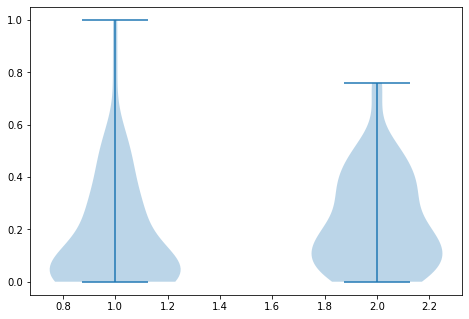

In [24]:
import matplotlib.pyplot as plt
minBenign = benignData[:,0]
minMalignant = malignantData[:,0]
minData = [minBenign, minMalignant]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.violinplot(minData)
plt.show()

 - Plot the boxplots of the benign and malignant datasets in two separate graphs. A boxplot shows the distribution of a feature using its quartiles. To do this you can use function pyplot.boxplot()https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

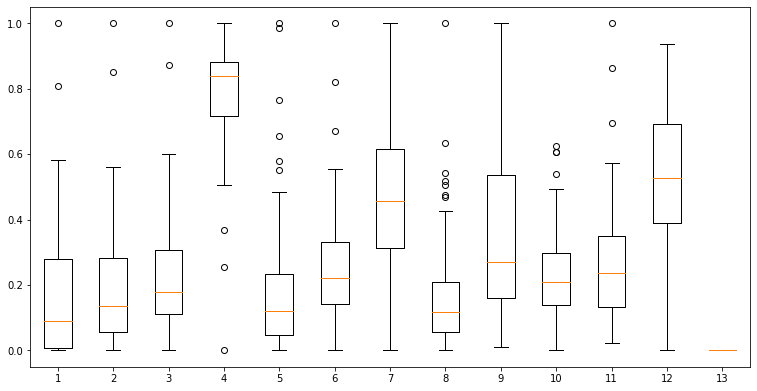

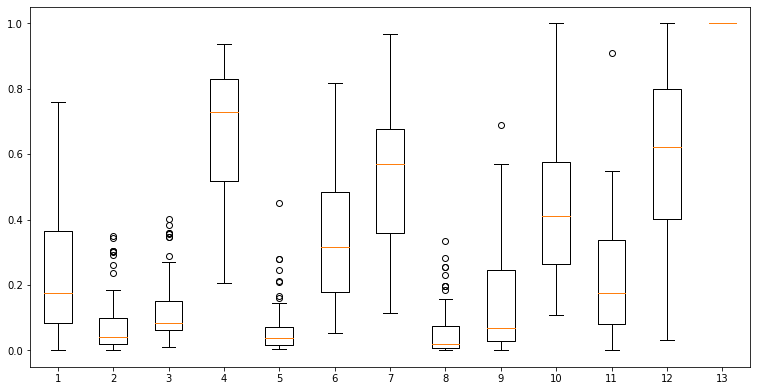

In [26]:
allBenignData = np.concatenate([benignData[:,:]])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.boxplot(allBenignData)
plt.show()

allmalignantData = np.concatenate([malignantData[:,:]])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.boxplot(allmalignantData)
plt.show()

 - Plot the histogram of the feature surface over volume of the benign and malignant datasets in one graph. The histogram shows the distribution of a single feature. To do this you can use function pyplot.hist https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


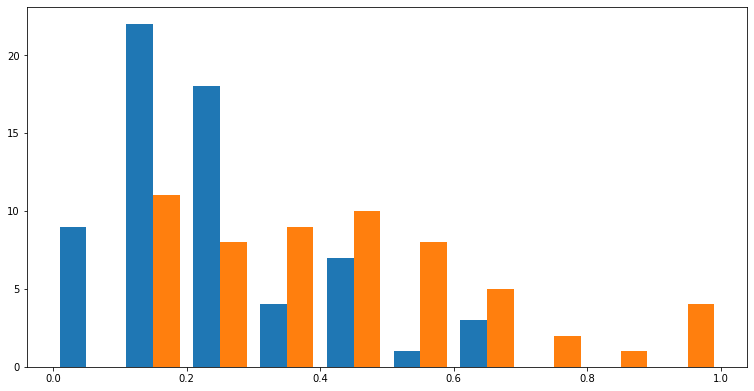

In [27]:
svBenign = benignData[:,9]
svMalignant = malignantData[:,9]
svData = [svBenign, svMalignant]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(svData)
plt.show()

 - Finally, plot in a 2X2 figure the scatter plots of the following combinations of features:
- min and rms
- max and range
- range and surface over volume
- volume and surface

A scatterplot shows the relation between two features.

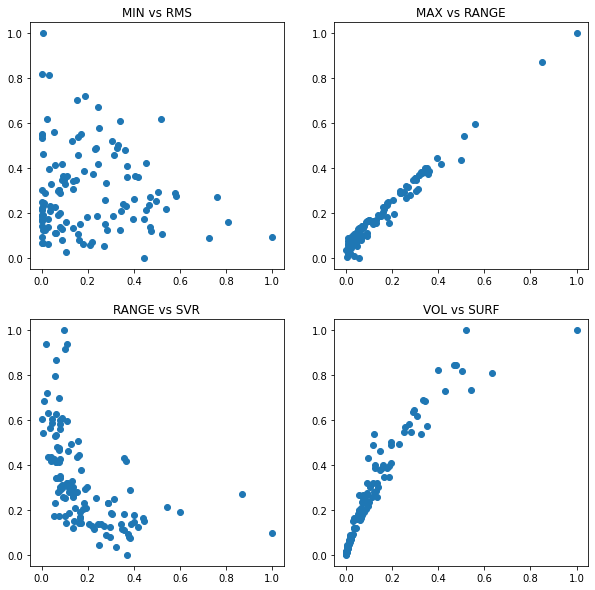

In [28]:
minimums = features[:,0]
RMSes = features[:,5]
maximums = features[:,1]
ranges = features[:,2]
svRatios = features[:,9]
surfaces = features[:,8]
volumes = features[:,7]

fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1), plt.title('MIN vs RMS')
plt.scatter(minimums, RMSes)
plt.subplot(2, 2, 2), plt.title('MAX vs RANGE')
plt.scatter(maximums, ranges)
plt.subplot(2, 2, 3), plt.title('RANGE vs SVR')
plt.scatter(ranges, svRatios)
plt.subplot(2, 2, 4), plt.title('VOL vs SURF')
plt.scatter(volumes, surfaces)
plt.show()
#RMS = sqrt(energy/Np) - svRatio = shape of the ROI, lower=>more sphere-like

 - Describe the relationships you see between the features

<font color=blue> Your answer here: </font> MIN-vs-RMS plot illustrates that minimums and RMS have a weak inverse correlation meaning by increasing one of them, the other one decreases. MAX-vs-RANGE plot illustrates that they are linearly correlated like y = x. RANGE-vs-SVR plot illustrates that they are inversely correlated like y = 1/x. VOL-vs-SURF plot illustrates that they are correlated like y = ax meaning with increasing volume, surface increases a times more.

## Part 3: A simple classifier

Take the features resulting from dropping the last column of the dataframe in the beginning of part 2. This is the set of features describing the ROIs of the 122 patients. The dropped column is the label assigned to the ROI.<br>
In this exercise you will train a classifier with a portion of the features' set and use it to predict the label of an unseen set of features
 -  Divide your dataset in training and testing parts so that 70% of the dataset is a training set and 30% a test set. (use random state=40). https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [29]:
from sklearn.model_selection import train_test_split
features_labelfree = np.delete(features, np.s_[12:13], axis=1)
label = features[:,12]
X_train, X_test, Y_train, Y_test = train_test_split(features_labelfree, label, test_size=0.3, random_state=40)

 -  Normalize the training set and apply the normalization on the test set. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

In [30]:
from sklearn.preprocessing import MinMaxScaler
trainScaler = MinMaxScaler()
normX_train = trainScaler.fit_transform(X_train)
normX_test = trainScaler.transform(X_test)

 -  Use the normalized training set to train an SVM classifier and predict on the unseen testing set. Use the default values of the classifier found here https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(normX_train, Y_train)
Y_pred = clf.predict(normX_test)
print(Y_pred)

[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


 -  Calculate the score of your classifier using function https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score

In [32]:
predictedTest = clf.score(normX_test,Y_test)
print(predictedTest)

0.6486486486486487
